# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

data = pd.read_csv('demo01.csv') #usei a demo1, pois a que usei no ex anterior não tem variavel mau.

X = data.drop(columns=['mau'])  
y = data['mau']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = pd.get_dummies(X_train)
X_val = pd.get_dummies(X_val)

print("Tamanho do conjunto de validação (X_val):", X_val.shape)
print("Tamanho do conjunto de treinamento da variável resposta (y_train):", y_train.shape)
print("Tamanho do conjunto de validação da variável resposta (y_val):", y_val.shape)

Tamanho do conjunto de validação (X_val): (4995, 35)
Tamanho do conjunto de treinamento da variável resposta (y_train): (11655,)
Tamanho do conjunto de validação da variável resposta (y_val): (4995,)


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [50]:
modelo_arvore_decisao = DecisionTreeClassifier()

In [51]:
X_train = pd.get_dummies(X_train)
modelo_arvore_decisao.fit(X_train, y_train)
modelo_arvore_decisao = DecisionTreeClassifier ()
modelo_arvore_decisao.fit(X_train, y_train)

DecisionTreeClassifier()

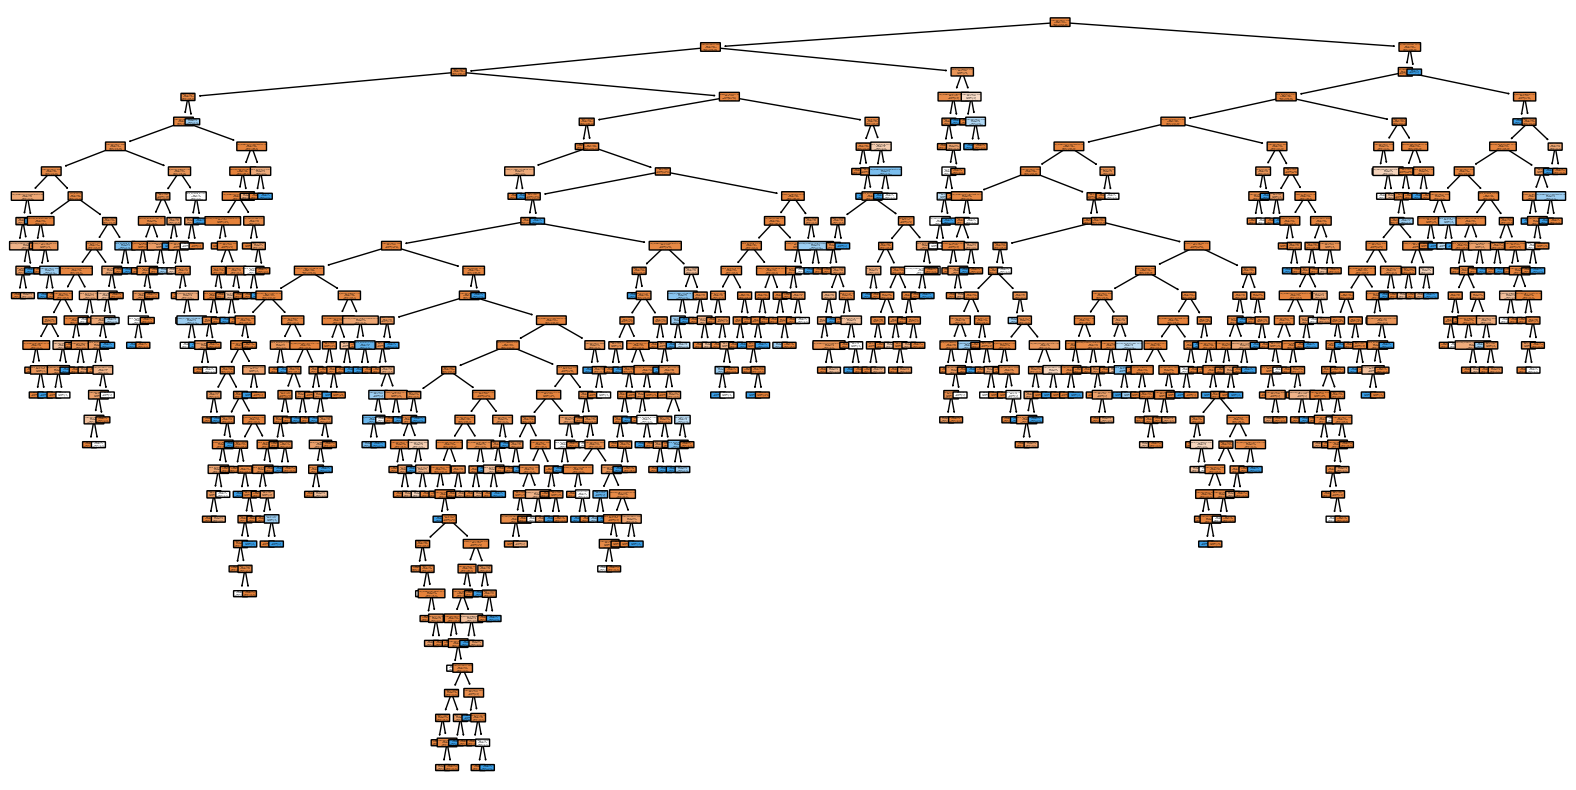

In [52]:
feature_names = list(X_train.columns)

# Definir tamanho da figura
plt.figure(figsize=(20, 10))

# Visualizar a árvore de decisão
plot_tree(modelo_arvore_decisao, feature_names=feature_names, class_names=rotulos, filled=True, rounded=True)

# Exibir a árvore de decisão
plt.show()

<Figure size 800x600 with 0 Axes>

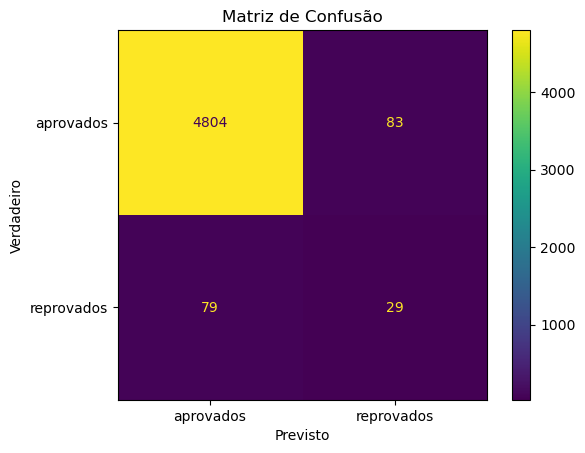

In [54]:
y_pred = modelo_arvore_decisao.predict(X_val)
rotulos = ['aprovados', 'reprovados']
# Calcular a matriz de confusão
cm = confusion_matrix(y_val, y_pred)
# Criar a visualização da matriz de confusão com rótulos personalizados
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rotulos)
# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
disp.plot(cmap='viridis')
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

In [55]:
y_pred_train = modelo_arvore_decisao.predict(X_train)

# Calcular a acurácia na base de treinamento
acuracia_train = accuracy_score(y_train, y_pred_train)

# Exibir a acurácia na base de treinamento
print("Acurácia na base de treinamento:", acuracia_train)

Acurácia na base de treinamento: 0.9912483912483913


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [60]:
#1) Classifique a base de teste de acordo com a árvore que você treinou no item 2.
y_pred_test = modelo_arvore_decisao.predict(X_val)
y_pred_test

array([False, False, False, ...,  True, False, False])

<Figure size 800x600 with 0 Axes>

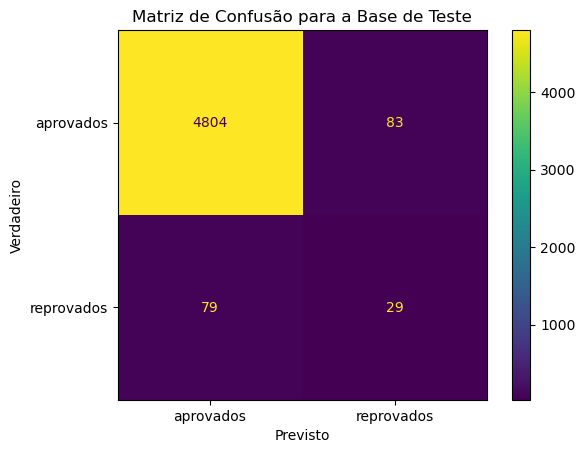

In [63]:
#2) Produza a visualização da matriz de confusão para a base de teste.Calcular a matriz de confusão
cm_test = confusion_matrix(y_val, y_pred_test)

# Criar a visualização da matriz de confusão com rótulos personalizados
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=rotulos)

# Plotar a matriz de confusão para a base de teste
plt.figure(figsize=(8, 6))
disp_test.plot(cmap='viridis')
plt.title('Matriz de Confusão para a Base de Teste')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

In [66]:
#3)Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
acuracia_teste = accuracy_score(y_val, y_pred_test)
print("Acurácia na base de teste:", acuracia_teste)
print("Acurácia na base de treinamento:", acuracia_train)

Acurácia na base de teste: 0.9675675675675676
Acurácia na base de treinamento: 0.9912483912483913


<Figure size 800x600 with 0 Axes>

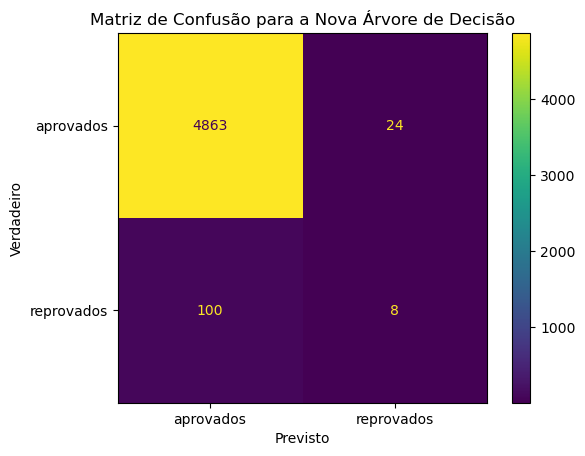

Proporção de proponentes classificados como 'maus': 0.25


In [71]:
# 4)Definir a árvore de decisão com os parâmetros especificados
modelo_arvore_decisao_nova = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)

# Treinar o modelo com os dados de treinamento
modelo_arvore_decisao_nova.fit(X_train, y_train)

# Fazer previsões na base de teste
y_pred_nova = modelo_arvore_decisao_nova.predict(X_val)

# Calcular a matriz de confusão
cm_nova = confusion_matrix(y_val, y_pred_nova)

# Criar a visualização da matriz de confusão com rótulos personalizados
disp_nova = ConfusionMatrixDisplay(confusion_matrix=cm_nova, display_labels=rotulos)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
disp_nova.plot(cmap='viridis')
plt.title('Matriz de Confusão para a Nova Árvore de Decisão')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

# Calcular a proporção de proponentes classificados como 'maus'
proporcao_maus = cm_nova[1, 1] / cm_nova[:, 1].sum()
print("Proporção de proponentes classificados como 'maus':", proporcao_maus)

In [73]:
# 5)Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?
proporcao_bons = (y_val == 'bons').mean()
print("Acurácia ao classificar todos os contratos como 'bons':", proporcao_bons)

Acurácia ao classificar todos os contratos como 'bons': 0.0
